In [28]:
import findspark
findspark.init()
import pyspark
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('deep')

In [2]:
spark = SparkSession.builder \
        .appName('Online-Retail-Visualization') \
        .getOrCreate()

In [6]:
df = spark.read.csv(r'c://users/casti/OneDrive/Documents/Coding Projects/SQL Projects/On_Re.csv', header=True, inferSchema=True)

In [7]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- InvoiceNo: string (nullable = true)
 |-- StockCode: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- InvoiceDate: timestamp (nullable = true)
 |-- UnitPrice: double (nullable = true)
 |-- CustomerID: double (nullable = true)
 |-- Country: string (nullable = true)



In [8]:
df.show(10)

+---+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|_c0|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|  0|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|  1|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|  2|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|  3|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|  4|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|  5|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United K

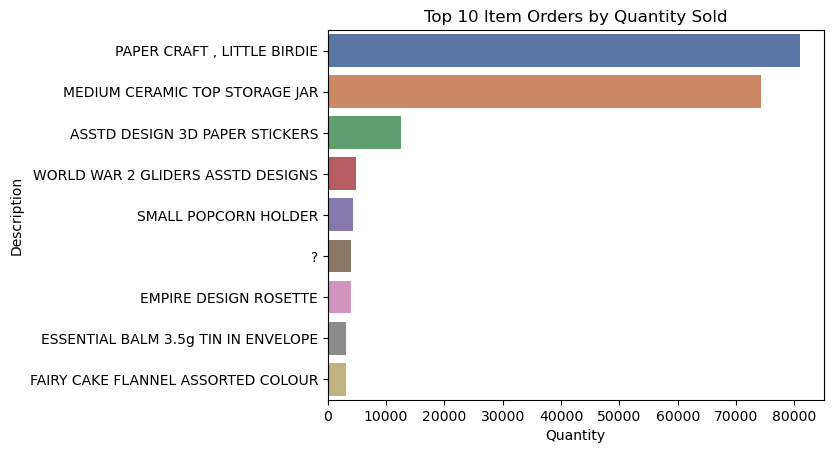

In [47]:
filtered = df.filter(df.Quantity > 2000).orderBy(df.Quantity, ascending=False)
sel = filtered.select('Description','Quantity')
dfp = sel.toPandas()
dfp10 = dfp.head(10)
sns.barplot(x = dfp10.Quantity, y = dfp10.Description, palette='deep')
plt.title('Top 10 Item Orders by Quantity Sold')
plt.show();


In [34]:
from pyspark.sql.functions import round

dfnew = df.withColumn('revenue', df.Quantity*df.UnitPrice)
dfnew = dfnew.withColumn('revenue', round(dfnew.revenue, 2))
dfnew.show(10)

+---+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-------+
|_c0|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|revenue|
+---+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+-------+
|  0|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|   15.3|
|  1|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|  20.34|
|  2|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|   22.0|
|  3|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|  20.34|
|  4|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|  20.34|
|  5|   536365|    22752|SET 7 BABUSHKA 

In [43]:
dfrev = dfnew.groupBy('Description').agg({'revenue':'sum'})
dfrev = dfrev.withColumnRenamed('sum(revenue)', 'total_revenue')
dfrev = dfrev.withColumn('total_revenue', round(dfrev['total_revenue'], 2)).orderBy(dfrev.total_revenue, ascending=False)

dfrev.show(10)

+--------------------+-------------+
|         Description|total_revenue|
+--------------------+-------------+
|      DOTCOM POSTAGE|    206245.48|
|REGENCY CAKESTAND...|    164762.19|
|WHITE HANGING HEA...|     99668.47|
|       PARTY BUNTING|     98302.98|
|JUMBO BAG RED RET...|     92356.03|
|  RABBIT NIGHT LIGHT|     66756.59|
|             POSTAGE|     66230.64|
|PAPER CHAIN KIT 5...|     63791.94|
|ASSORTED COLOUR B...|     58959.73|
|       CHILLI LIGHTS|     53768.06|
+--------------------+-------------+
only showing top 10 rows



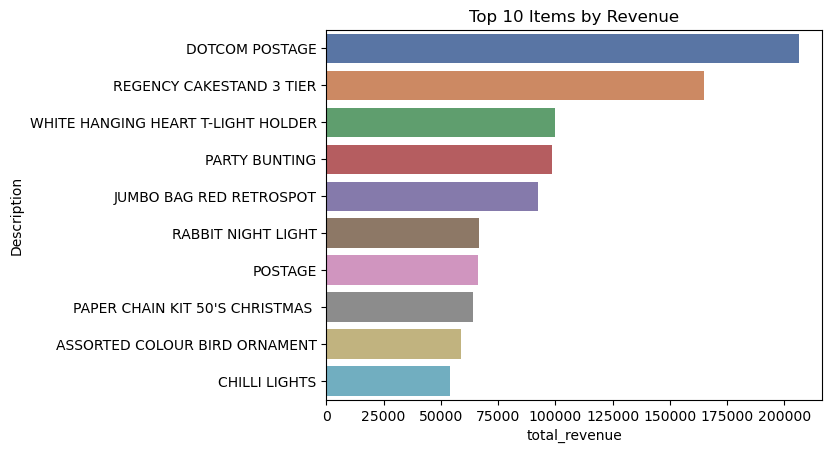

In [45]:
dfp = dfrev.toPandas()
dfp10 = dfp.head(10)
sns.barplot(x = dfp10.total_revenue, y = dfp10.Description, palette='deep')
plt.title('Top 10 Items by Revenue')
plt.show();

### Transitioning to SparkSQL for more thorough visualization. 

In [49]:
df.createOrReplaceTempView('retail')

In [52]:
res = spark.sql('SELECT * FROM retail LIMIT 10;')

res.show()

+---+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|_c0|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+---+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|  0|   536365|   85123A|WHITE HANGING HEA...|       6|2010-12-01 08:26:00|     2.55|   17850.0|United Kingdom|
|  1|   536365|    71053| WHITE METAL LANTERN|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|  2|   536365|   84406B|CREAM CUPID HEART...|       8|2010-12-01 08:26:00|     2.75|   17850.0|United Kingdom|
|  3|   536365|   84029G|KNITTED UNION FLA...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|  4|   536365|   84029E|RED WOOLLY HOTTIE...|       6|2010-12-01 08:26:00|     3.39|   17850.0|United Kingdom|
|  5|   536365|    22752|SET 7 BABUSHKA NE...|       2|2010-12-01 08:26:00|     7.65|   17850.0|United K

In [70]:
res = spark.sql('SELECT Country, SUM(Quantity) AS total_sold FROM retail GROUP BY Country ORDER BY total_sold DESC LIMIT 20;')
res.show()

+---------------+----------+
|        Country|total_sold|
+---------------+----------+
| United Kingdom|   4263829|
|    Netherlands|    200128|
|           EIRE|    142637|
|        Germany|    117448|
|         France|    110480|
|      Australia|     83653|
|         Sweden|     35637|
|    Switzerland|     30325|
|          Spain|     26824|
|          Japan|     25218|
|        Belgium|     23152|
|         Norway|     19247|
|       Portugal|     16180|
|        Finland|     10666|
|Channel Islands|      9479|
|        Denmark|      8188|
|          Italy|      7999|
|         Cyprus|      6317|
|      Singapore|      5234|
|        Austria|      4827|
+---------------+----------+



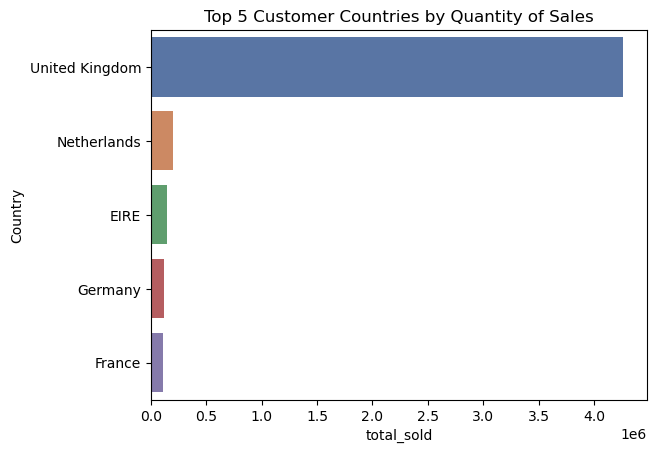

In [71]:
dfp = res.toPandas().head(5)
sns.barplot(x=dfp.total_sold, y=dfp.Country, palette='deep')
plt.title('Top 5 Customer Countries by Quantity of Sales')
plt.show();

In [72]:
def sql(statement):
    res = spark.sql(statement)
    res.show()
    return res

In [73]:
res = sql("""WITH cte AS 
            (SELECT *, Quantity*UnitPrice AS revenue 
            FROM retail)
        SELECT Country, ROUND(SUM(revenue),2) AS total_revenue
        FROM cte
        GROUP BY Country
        ORDER BY total_revenue DESC
        LIMIT 20;""")

+---------------+-------------+
|        Country|total_revenue|
+---------------+-------------+
| United Kingdom|   8187806.36|
|    Netherlands|    284661.54|
|           EIRE|    263276.82|
|        Germany|    221698.21|
|         France|     197403.9|
|      Australia|    137077.27|
|    Switzerland|     56385.35|
|          Spain|     54774.58|
|        Belgium|     40910.96|
|         Sweden|     36595.91|
|          Japan|     35340.62|
|         Norway|     35163.46|
|       Portugal|     29367.02|
|        Finland|     22326.74|
|Channel Islands|     20086.29|
|        Denmark|     18768.14|
|          Italy|     16890.51|
|         Cyprus|     12946.29|
|        Austria|     10154.32|
|      Hong Kong|     10117.04|
+---------------+-------------+



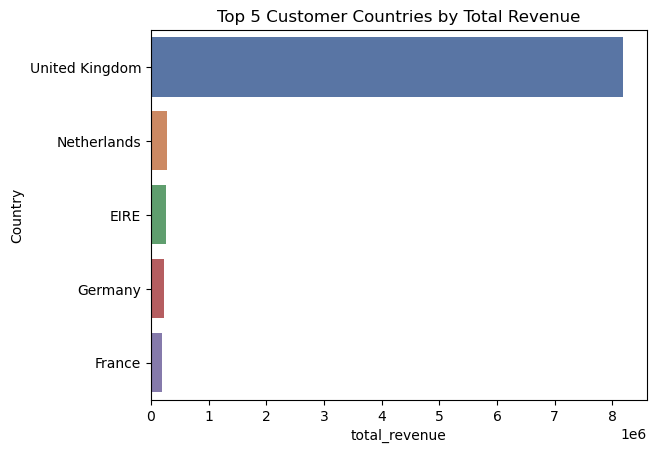

In [74]:
dfp = res.toPandas().head(5)
sns.barplot(x=dfp.total_revenue, y=dfp.Country)
plt.title('Top 5 Customer Countries by Total Revenue')
plt.show();

In [78]:
res = sql("""

WITH cte AS 
(SELECT *, ROUND(Quantity*UnitPrice, 2) AS revenue 
FROM retail)

SELECT Description, ROUND(SUM(revenue),2) AS total_revenue
FROM cte
WHERE Country = 'United Kingdom'
GROUP BY Description
ORDER BY total_revenue DESC
LIMIT 10;

""")

+--------------------+-------------+
|         Description|total_revenue|
+--------------------+-------------+
|      DOTCOM POSTAGE|    206245.48|
|REGENCY CAKESTAND...|    134405.94|
|WHITE HANGING HEA...|     93953.07|
|       PARTY BUNTING|     92501.73|
|JUMBO BAG RED RET...|     84516.44|
|PAPER CHAIN KIT 5...|     61888.19|
|ASSORTED COLOUR B...|     54662.15|
|       CHILLI LIGHTS|     52986.86|
|PICNIC BASKET WIC...|      39619.5|
|BLACK RECORD COVE...|      39387.0|
+--------------------+-------------+



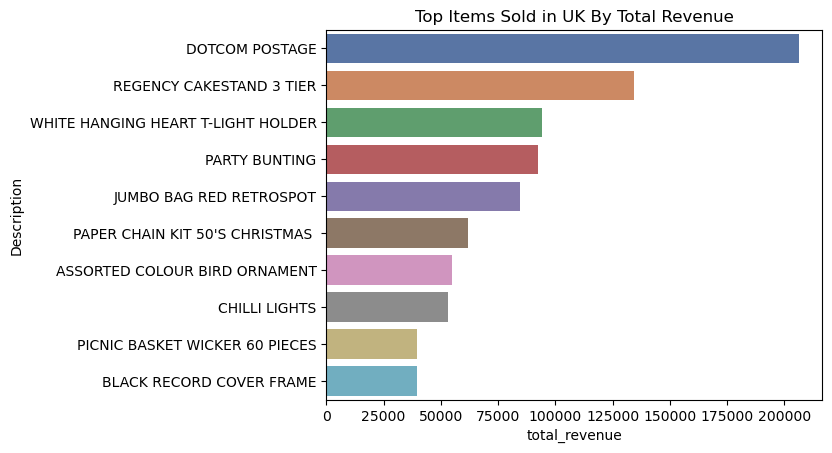

In [79]:
dfp = res.toPandas()
sns.barplot(x=dfp.total_revenue, y=dfp.Description, palette='deep')
plt.title('Top Items Sold in UK By Total Revenue')
plt.show();

### How are these trends in the UK changing over time?

In [100]:
res = sql("""

SELECT InvoiceDate
FROM retail
ORDER BY InvoiceDate
LIMIT 1;

""")

+-------------------+
|        InvoiceDate|
+-------------------+
|2010-12-01 08:26:00|
+-------------------+



In [101]:
res = sql("""

SELECT InvoiceDate
FROM retail
ORDER BY InvoiceDate DESC
LIMIT 1;

""")

+-------------------+
|        InvoiceDate|
+-------------------+
|2011-12-09 12:50:00|
+-------------------+



In [144]:
res = sql("""

WITH cte AS (
SELECT *, ROUND(Quantity*UnitPrice, 2) AS revenue 
FROM retail
),

    cte2 AS (
    SELECT Description, revenue, InvoiceDate,
        ROUND(SUM(revenue) OVER(PARTITION BY Description ORDER BY InvoiceDate 
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW),2) AS cumulative_rev
    FROM cte
    WHERE Country = 'United Kingdom'
    ),
    
    cte3 AS (
    SELECT 
                    Description AS item,                
                    EXTRACT(MONTH FROM InvoiceDate) AS month,
                    EXTRACT(YEAR FROM InvoiceDate) AS year,
                    cumulative_rev
    FROM cte2
    WHERE Description IN
        (SELECT Description
        FROM cte2
        GROUP BY Description
        HAVING MAX(cumulative_rev) > 75000)
)

SELECT item, month, year, AVG(cumulative_rev) AS monthly_cumulative_rev
FROM cte3
GROUP BY item, month, year
ORDER BY year, month

""")

+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|       PARTY BUNTING|   12|2010|     635.1977272727273|
|      DOTCOM POSTAGE|   12|2010|    14941.052222222219|
|JUMBO BAG RED RET...|   12|2010|    2218.4712711864418|
|REGENCY CAKESTAND...|   12|2010|    13797.811213872832|
|WHITE HANGING HEA...|   12|2010|     5455.776808510637|
|      DOTCOM POSTAGE|    1|2011|    32406.397258064517|
|       PARTY BUNTING|    1|2011|     2211.349122807017|
|REGENCY CAKESTAND...|    1|2011|    29886.535846153864|
|JUMBO BAG RED RET...|    1|2011|     6407.506306306306|
|MEDIUM CERAMIC TO...|    1|2011|               38591.8|
|WHITE HANGING HEA...|    1|2011|    19010.510722222225|
|      DOTCOM POSTAGE|    2|2011|     43860.32389830508|
|       PARTY BUNTING|    2|2011|     5137.755999999997|
|REGENCY CAKESTAND...|    2|2011|    36976.011076923125|
|JUMBO BAG RED RET...|    2|201

In [145]:
dfp = res.toPandas()
dfp.shape

(75, 4)

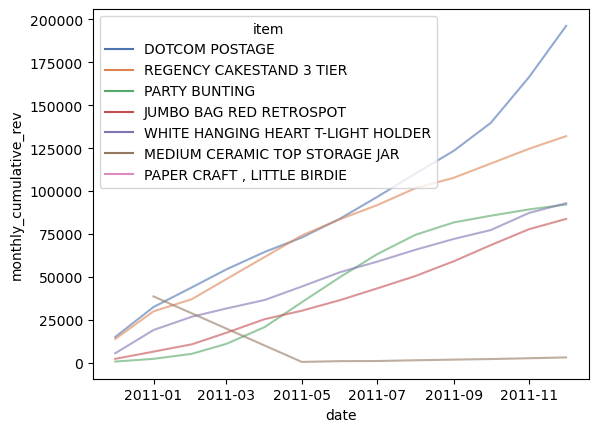

In [154]:
dfp['date'] = pd.to_datetime(dfp['year'].astype(str) + '-' + dfp['month'].astype(str) + '-01')

sns.lineplot(x=dfp.date, y=dfp.monthly_cumulative_rev, hue=dfp.item, alpha=0.6)
plt.show()

In [155]:
dfp.head(50)

,item,month,year,monthly_cumulative_rev,date
0,DOTCOM POSTAGE,12,2010,14941.052222,2010-12-01
1,REGENCY CAKESTAND 3 TIER,12,2010,13797.811214,2010-12-01
2,PARTY BUNTING,12,2010,635.197727,2010-12-01
3,JUMBO BAG RED RETROSPOT,12,2010,2218.471271,2010-12-01
4,WHITE HANGING HEART T-LIGHT HOLDER,12,2010,5455.776809,2010-12-01
5,DOTCOM POSTAGE,1,2011,32406.397258,2011-01-01
6,REGENCY CAKESTAND 3 TIER,1,2011,29886.535846,2011-01-01
7,PARTY BUNTING,1,2011,2211.349123,2011-01-01
8,JUMBO BAG RED RETROSPOT,1,2011,6407.506306,2011-01-01
9,MEDIUM CERAMIC TOP STORAGE JAR,1,2011,38591.800000,2011-01-01


In [153]:
sql("""

SELECT * 
FROM retail
WHERE Description = 'MEDIUM CERAMIC TOP STORAGE JAR'
LIMIT 5

""")

+------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
|   _c0|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country|
+------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+
| 61619|   541431|    23166|MEDIUM CERAMIC TO...|   74215|2011-01-18 10:01:00|     1.04|   12346.0|United Kingdom|
| 61624|  C541433|    23166|MEDIUM CERAMIC TO...|  -74215|2011-01-18 10:17:00|     1.04|   12346.0|United Kingdom|
|186770|   552882|    23166|MEDIUM CERAMIC TO...|      96|2011-05-12 10:10:00|     1.04|   14646.0|   Netherlands|
|187196|   552953|    23166|MEDIUM CERAMIC TO...|       4|2011-05-12 12:11:00|     1.25|   16745.0|United Kingdom|
|187718|   553005|    23166|MEDIUM CERAMIC TO...|       5|2011-05-12 16:29:00|     1.25|   14651.0|United Kingdom|
+------+---------+---------+--------------------+--------+-------------------+--

DataFrame[_c0: int, InvoiceNo: string, StockCode: string, Description: string, Quantity: int, InvoiceDate: timestamp, UnitPrice: double, CustomerID: double, Country: string]

In [156]:
res = sql("""

WITH cte AS (
SELECT *, ROUND(Quantity*UnitPrice, 2) AS revenue 
FROM retail
),

    cte2 AS (
    SELECT Description, revenue, InvoiceDate,
        ROUND(SUM(revenue) OVER(PARTITION BY Description ORDER BY InvoiceDate 
        ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW),2) AS cumulative_rev
    FROM cte
    WHERE Country = 'United Kingdom'
    ),
    
    cte3 AS (
    SELECT 
                    Description AS item,                
                    EXTRACT(MONTH FROM InvoiceDate) AS month,
                    EXTRACT(YEAR FROM InvoiceDate) AS year,
                    cumulative_rev
    FROM cte2
    WHERE Description IN
        (SELECT Description
        FROM cte2
        GROUP BY Description
        HAVING MAX(cumulative_rev) > 80000)
)

SELECT item, month, year, AVG(cumulative_rev) AS monthly_cumulative_rev
FROM cte3
GROUP BY item, month, year
ORDER BY year, month

""")

+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|JUMBO BAG RED RET...|   12|2010|    2218.4712711864418|
|       PARTY BUNTING|   12|2010|     635.1977272727273|
|      DOTCOM POSTAGE|   12|2010|    14941.052222222219|
|WHITE HANGING HEA...|   12|2010|     5455.776808510637|
|REGENCY CAKESTAND...|   12|2010|    13797.811213872832|
|       PARTY BUNTING|    1|2011|     2211.349122807017|
|JUMBO BAG RED RET...|    1|2011|     6407.506306306306|
|      DOTCOM POSTAGE|    1|2011|    32406.397258064517|
|WHITE HANGING HEA...|    1|2011|    19010.510722222225|
|REGENCY CAKESTAND...|    1|2011|    29886.535846153864|
|       PARTY BUNTING|    2|2011|     5137.755999999997|
|JUMBO BAG RED RET...|    2|2011|      10675.5124137931|
|      DOTCOM POSTAGE|    2|2011|     43860.32389830508|
|WHITE HANGING HEA...|    2|2011|    26743.387857142858|
|REGENCY CAKESTAND...|    2|201

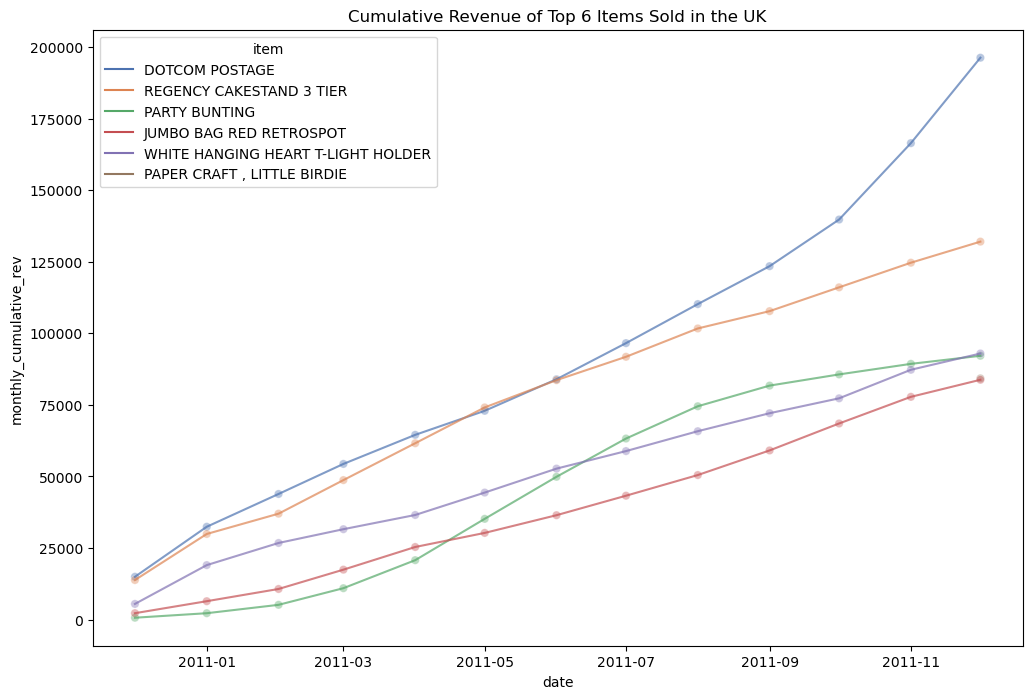

In [164]:
dfp = res.toPandas()

dfp['date'] = pd.to_datetime(dfp['year'].astype(str) + '-' + dfp['month'].astype(str) + '-01')

plt.figure(figsize=(12,8))
sns.lineplot(x=dfp.date, y=dfp.monthly_cumulative_rev, hue=dfp.item, alpha=0.7)
sns.scatterplot(x='date', y='monthly_cumulative_rev', hue='item', data=dfp, marker='o', alpha=0.4, legend=False)

plt.title('Cumulative Revenue of Top 6 Items Sold in the UK')
plt.show();

### Two conclusions to draw from this: 
### 1. It looks like DOTCOM POSTAGE is on the rise, so we can continue to capitalize on that.
### 2. Even though Party Bunting has been a good revenue driver over the year, it looks like it's plateauing. Let's take a look at a few other countries to get a better idea.

### As a reminder, the most profitable countries besides the UK are Netherlands, EIRE, France, and Germany.

**************************************************
Generating SQL Query for Netherlands...
**************************************************
+-------------+-----+----+----------------------+
|         item|month|year|monthly_cumulative_rev|
+-------------+-----+----+----------------------+
|      POSTAGE|   12|2010|                  22.5|
|      POSTAGE|    1|2011|                  45.0|
|      POSTAGE|    2|2011|                 160.0|
|      POSTAGE|    3|2011|                 288.0|
|      POSTAGE|    4|2011|                 480.0|
|      POSTAGE|    5|2011|                 650.0|
|      POSTAGE|    6|2011|                779.25|
|      POSTAGE|    7|2011|                 843.0|
|PARTY BUNTING|    8|2011|                 207.5|
|      POSTAGE|    9|2011|                 903.0|
|      POSTAGE|   10|2011|                1123.0|
|      POSTAGE|   11|2011|              1402.125|
+-------------+-----+----+----------------------+



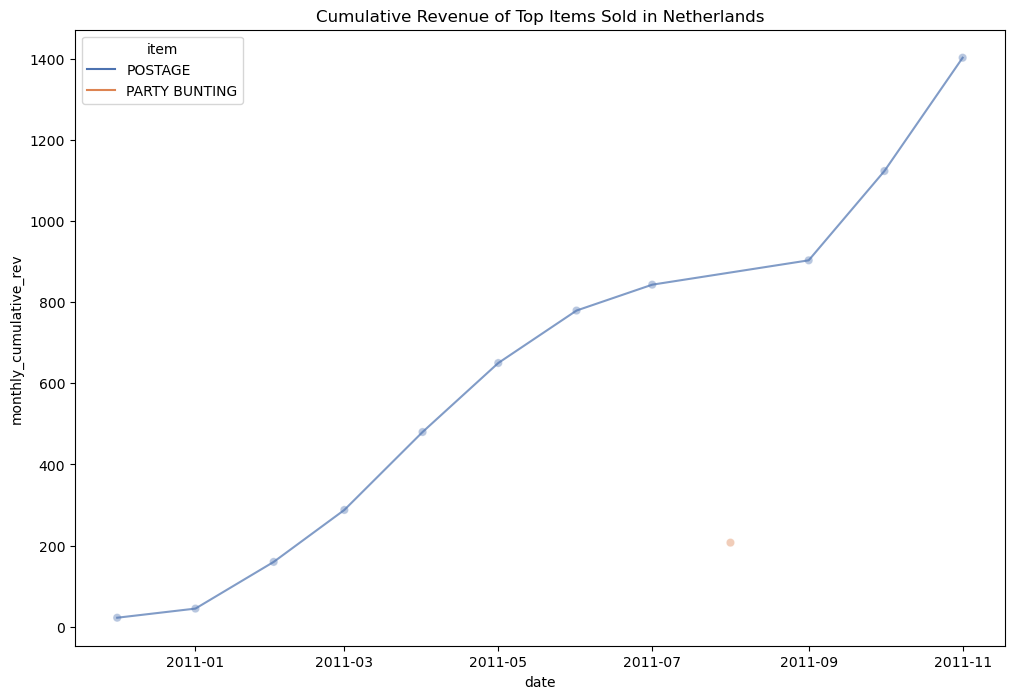

**************************************************
Generating SQL Query for EIRE...
**************************************************
+-------------+-----+----+----------------------+
|         item|month|year|monthly_cumulative_rev|
+-------------+-----+----+----------------------+
|PARTY BUNTING|    2|2011|                 44.55|
|PARTY BUNTING|    4|2011|                 64.35|
|PARTY BUNTING|    5|2011|                 306.5|
|PARTY BUNTING|    6|2011|     535.4499999999999|
|PARTY BUNTING|    7|2011|                 842.5|
|PARTY BUNTING|    9|2011|    1197.3999999999999|
|PARTY BUNTING|   10|2011|    1304.6499999999999|
|PARTY BUNTING|   11|2011|               1732.75|
+-------------+-----+----+----------------------+



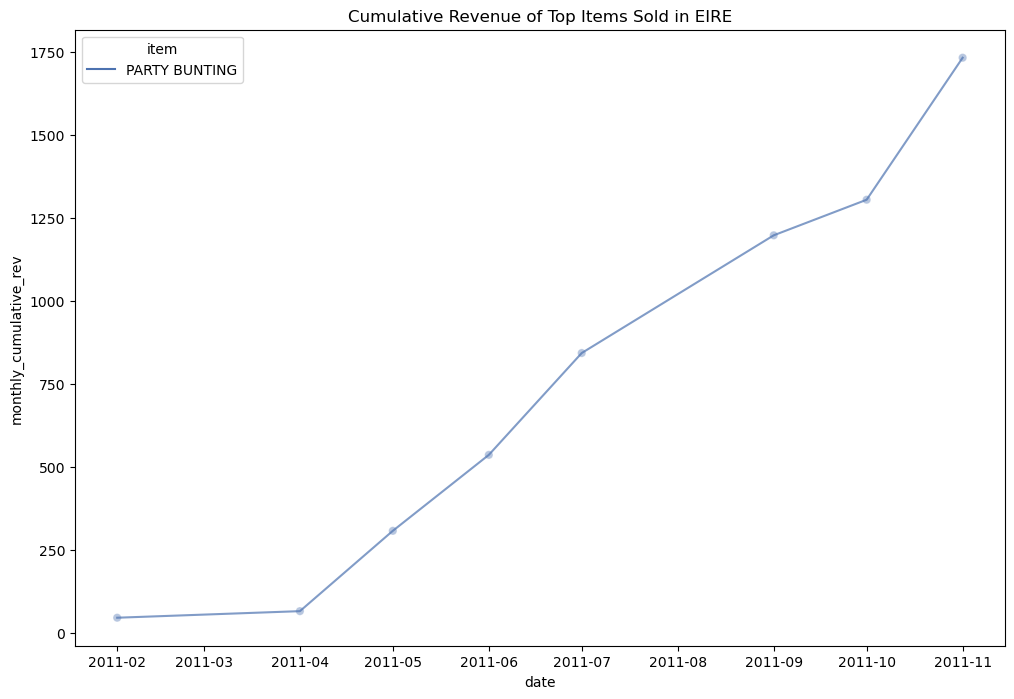

**************************************************
Generating SQL Query for France...
**************************************************
+-------------+-----+----+----------------------+
|         item|month|year|monthly_cumulative_rev|
+-------------+-----+----+----------------------+
|PARTY BUNTING|   12|2010|                 23.25|
|      POSTAGE|   12|2010|     515.6470588235294|
|PARTY BUNTING|    1|2011|                  46.5|
|      POSTAGE|    1|2011|               1672.56|
|PARTY BUNTING|    2|2011|                  96.0|
|      POSTAGE|    2|2011|                2885.4|
|PARTY BUNTING|    3|2011|                 155.4|
|      POSTAGE|    3|2011|                3663.0|
|PARTY BUNTING|    4|2011|                 165.3|
|      POSTAGE|    4|2011|                4435.2|
|PARTY BUNTING|    5|2011|                 234.6|
|      POSTAGE|    5|2011|             5200.0625|
|PARTY BUNTING|    6|2011|                 284.1|
|      POSTAGE|    6|2011|               6790.44|
|PARTY BUNTIN

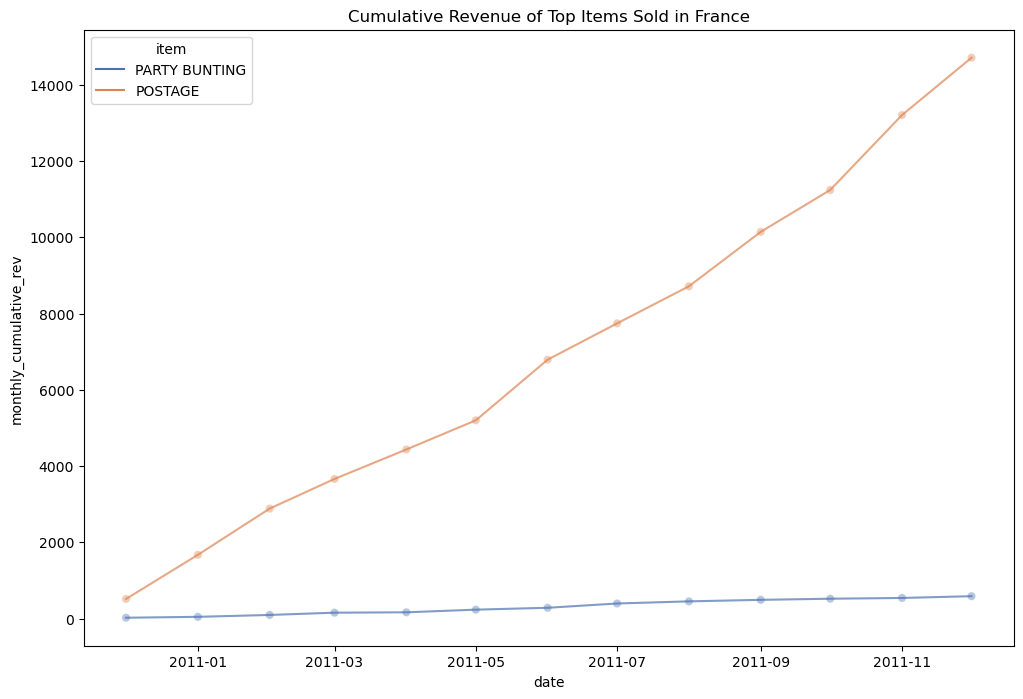

**************************************************
Generating SQL Query for Germany...
**************************************************
+-------------+-----+----+----------------------+
|         item|month|year|monthly_cumulative_rev|
+-------------+-----+----+----------------------+
|      POSTAGE|   12|2010|     855.3333333333334|
|PARTY BUNTING|    1|2011|                  46.5|
|      POSTAGE|    1|2011|    2760.8275862068967|
|      POSTAGE|    2|2011|    3845.6470588235293|
|PARTY BUNTING|    3|2011|     76.19999999999999|
|      POSTAGE|    3|2011|     4937.333333333333|
|      POSTAGE|    4|2011|                6372.0|
|      POSTAGE|    5|2011|             8130.4375|
|      POSTAGE|    6|2011|      9615.57142857143|
|      POSTAGE|    7|2011|    10812.739130434782|
|      POSTAGE|    8|2011|    12357.727272727272|
|PARTY BUNTING|    9|2011|                 145.5|
|      POSTAGE|    9|2011|    13802.885714285714|
|      POSTAGE|   10|2011|    16053.204081632653|
|      POSTA

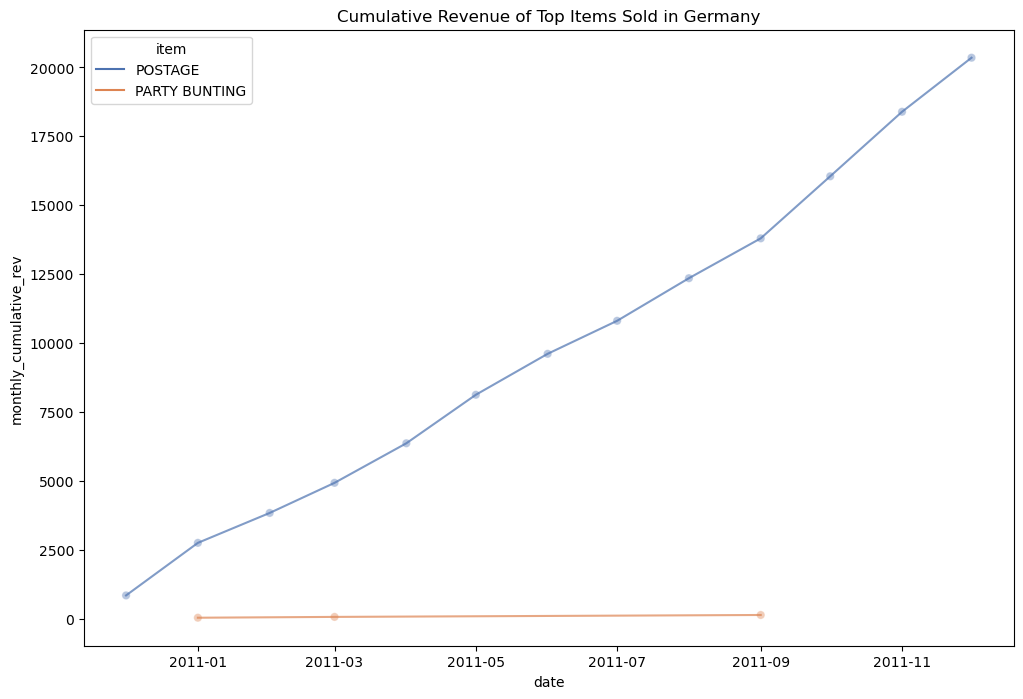

In [179]:
for country in ['Netherlands','EIRE','France','Germany']:
    
    print('*'*50)
    print(f'Generating SQL Query for {country}...')
    print('*'*50)
    
    res = sql(f"""

    WITH cte AS (
    SELECT *, ROUND(Quantity*UnitPrice, 2) AS revenue 
    FROM retail
    ),

        cte2 AS (
        SELECT Description, revenue, InvoiceDate,
            ROUND(SUM(revenue) OVER(PARTITION BY Description ORDER BY InvoiceDate 
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW),2) AS cumulative_rev
        FROM cte
        WHERE Country = '{country}'
        ),

        cte3 AS (
        SELECT 
                        Description AS item,                
                        EXTRACT(MONTH FROM InvoiceDate) AS month,
                        EXTRACT(YEAR FROM InvoiceDate) AS year,
                        cumulative_rev
        FROM cte2
        WHERE Description LIKE '%POSTAGE' 
            OR Description = 'PARTY BUNTING'
    )

    SELECT item, month, year, AVG(cumulative_rev) AS monthly_cumulative_rev
    FROM cte3
    GROUP BY item, month, year
    ORDER BY year, month

    """)
    
    dfp = res.toPandas()

    dfp['date'] = pd.to_datetime(dfp['year'].astype(str) + '-' + dfp['month'].astype(str) + '-01')

    plt.figure(figsize=(12,8))
    sns.lineplot(x=dfp.date, y=dfp.monthly_cumulative_rev, hue=dfp.item, alpha=0.7)
    sns.scatterplot(x='date', y='monthly_cumulative_rev', hue='item', data=dfp, marker='o', alpha=0.4, legend=False)

    plt.title(f'Cumulative Revenue of Top Items Sold in {country}')
    plt.show();

**************************************************
Generating SQL Query for Netherlands...
**************************************************
+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|RED TOADSTOOL LED...|   12|2010|                 417.6|
|ROUND SNACK BOXES...|   12|2010|                 489.6|
| SPACEBOY LUNCH BOX |   12|2010|                 211.2|
|DOLLY GIRL LUNCH BOX|    1|2011|    422.40000000000003|
|JUMBO BAG RED RET...|    1|2011|                 412.5|
|RED TOADSTOOL LED...|    1|2011|                 835.2|
|ROUND SNACK BOXES...|    1|2011|                 489.6|
|ROUND SNACK BOXES...|    1|2011|    1101.6000000000001|
| SPACEBOY LUNCH BOX |    1|2011|                 880.0|
|DOLLY GIRL LUNCH BOX|    2|2011|                1161.6|
|JUMBO BAG RED RET...|    2|2011|                 742.5|
|REGENCY CAKESTAND...|    2|2011|                 700.8|
|RO

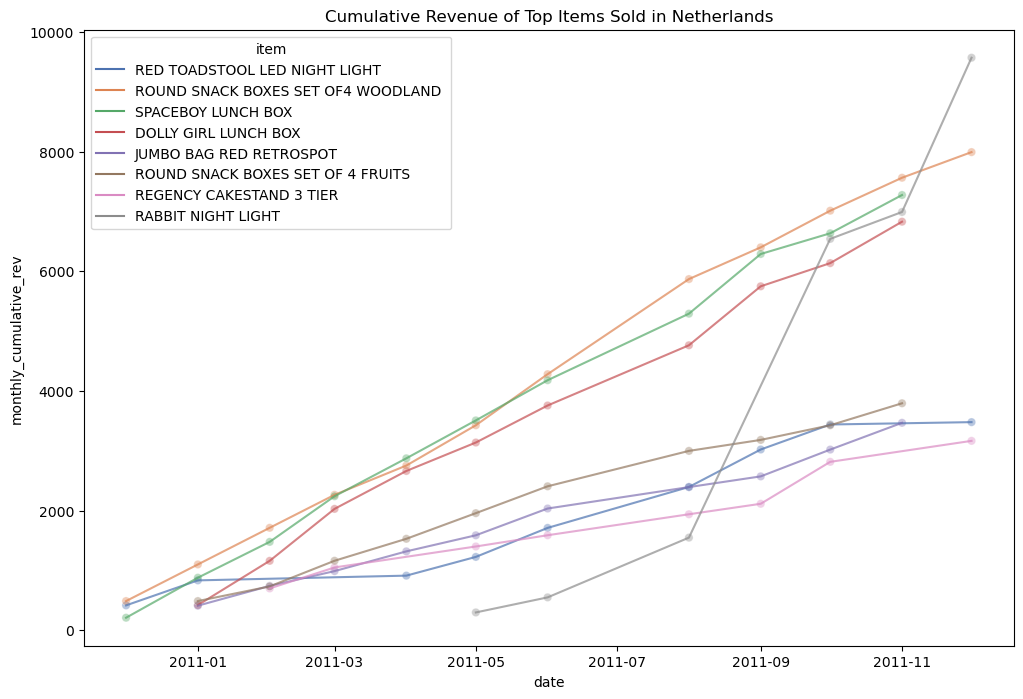

**************************************************
Generating SQL Query for EIRE...
**************************************************
+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|JAM MAKING SET WI...|   12|2010|                 83.25|
|            CARRIAGE|   12|2010|                 200.0|
|REGENCY CAKESTAND...|   12|2010|    380.14285714285717|
|            CARRIAGE|    1|2011|                 400.0|
|3 TIER CAKE TIN R...|    1|2011|                1224.0|
|JAM MAKING SET WI...|    1|2011|                 481.5|
|REGENCY CAKESTAND...|    1|2011|                2284.2|
|3 TIER CAKE TIN R...|    2|2011|                 816.0|
|            CARRIAGE|    2|2011|                598.75|
|JAM MAKING SET WI...|    2|2011|                 642.0|
|REGENCY CAKESTAND...|    2|2011|    2534.7999999999997|
|3 TIER CAKE TIN R...|    3|2011|                1428.0|
|         

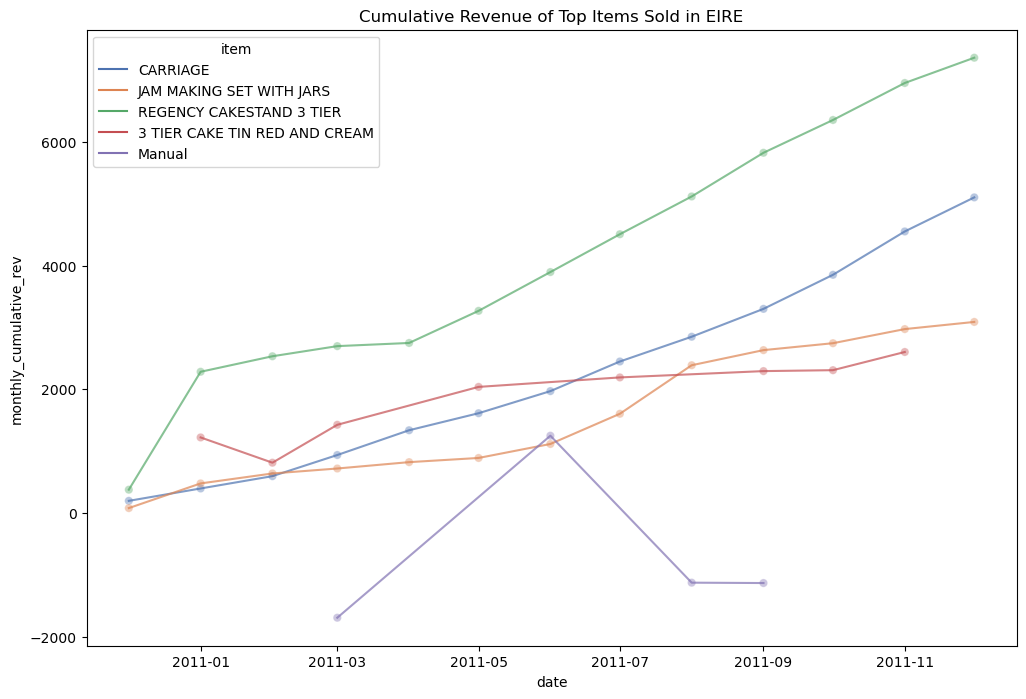

**************************************************
Generating SQL Query for France...
**************************************************
+------------------+-----+----+----------------------+
|              item|month|year|monthly_cumulative_rev|
+------------------+-----+----+----------------------+
|           POSTAGE|   12|2010|     515.6470588235294|
|           POSTAGE|    1|2011|               1672.56|
|           POSTAGE|    2|2011|                2885.4|
|           POSTAGE|    3|2011|                3663.0|
|            Manual|    4|2011|                568.15|
|           POSTAGE|    4|2011|                4435.2|
|            Manual|    5|2011|                  30.0|
|           POSTAGE|    5|2011|             5200.0625|
|RABBIT NIGHT LIGHT|    5|2011|    363.59999999999997|
|           POSTAGE|    6|2011|               6790.44|
|RABBIT NIGHT LIGHT|    6|2011|               916.824|
|           POSTAGE|    7|2011|     7742.421052631579|
|RABBIT NIGHT LIGHT|    7|2011|       

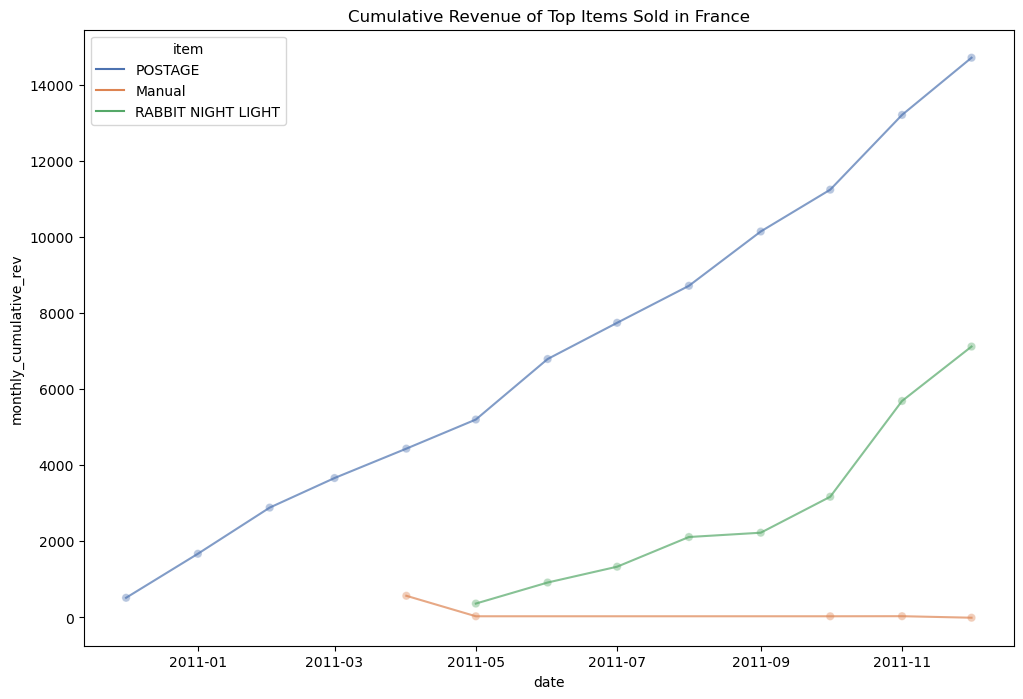

**************************************************
Generating SQL Query for Germany...
**************************************************
+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|             POSTAGE|   12|2010|     855.3333333333334|
|REGENCY CAKESTAND...|   12|2010|     661.5428571428572|
|ROUND SNACK BOXES...|   12|2010|    212.39999999999998|
|             POSTAGE|    1|2011|    2760.8275862068967|
|REGENCY CAKESTAND...|    1|2011|    1459.6499999999999|
|ROUND SNACK BOXES...|    1|2011|     433.6499999999999|
|             POSTAGE|    2|2011|    3845.6470588235293|
|REGENCY CAKESTAND...|    2|2011|              2070.625|
|ROUND SNACK BOXES...|    2|2011|     546.1714285714286|
|             POSTAGE|    3|2011|     4937.333333333333|
|REGENCY CAKESTAND...|    3|2011|    2420.4409090909094|
|ROUND SNACK BOXES...|    3|2011|     732.4849999999999|
|      

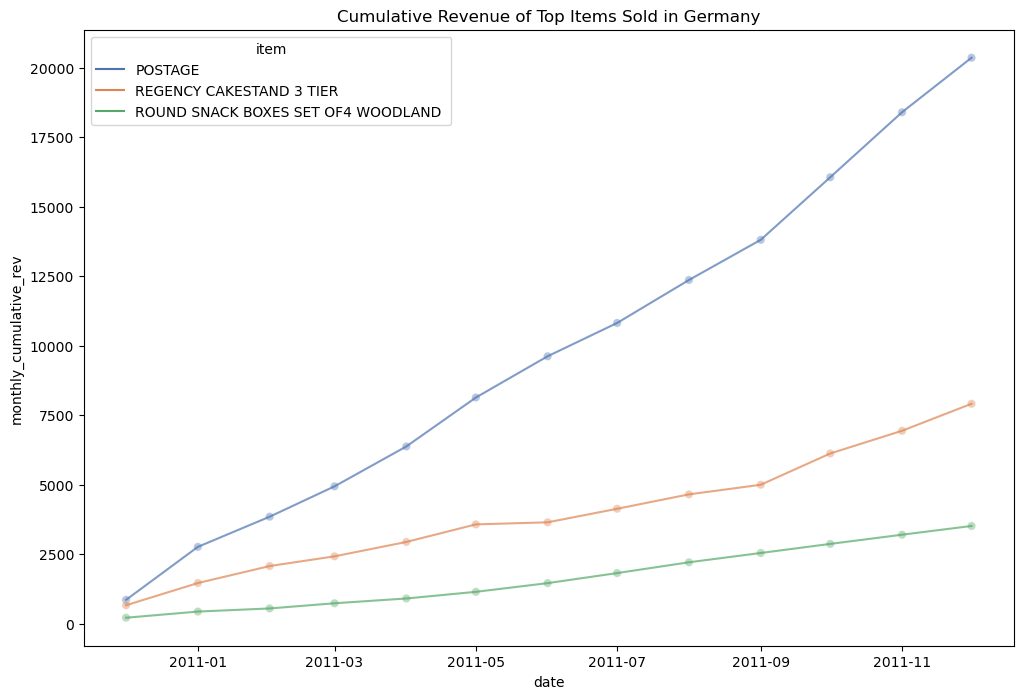

In [178]:
for country in ['Netherlands','EIRE','France','Germany']:
    
    print('*'*50)
    print(f'Generating SQL Query for {country}...')
    print('*'*50)
    
    res = sql(f"""

    WITH cte AS (
    SELECT *, ROUND(Quantity*UnitPrice, 2) AS revenue 
    FROM retail
    ),

        cte2 AS (
        SELECT Description, revenue, InvoiceDate,
            ROUND(SUM(revenue) OVER(PARTITION BY Description ORDER BY InvoiceDate 
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW),2) AS cumulative_rev
        FROM cte
        WHERE Country = '{country}'
        ),

        cte3 AS (
        SELECT 
                        Description AS item,                
                        EXTRACT(MONTH FROM InvoiceDate) AS month,
                        EXTRACT(YEAR FROM InvoiceDate) AS year,
                        cumulative_rev
        FROM cte2
        WHERE Description IN
            (SELECT Description
            FROM cte2
            GROUP BY Description
            HAVING MAX(cumulative_rev) > 3000)
    )

    SELECT item, month, year, AVG(cumulative_rev) AS monthly_cumulative_rev
    FROM cte3
    GROUP BY item, month, year
    ORDER BY year, month

    """)
    
    dfp = res.toPandas()

    dfp['date'] = pd.to_datetime(dfp['year'].astype(str) + '-' + dfp['month'].astype(str) + '-01')

    plt.figure(figsize=(12,8))
    sns.lineplot(x=dfp.date, y=dfp.monthly_cumulative_rev, hue=dfp.item, alpha=0.7)
    sns.scatterplot(x='date', y='monthly_cumulative_rev', hue='item', data=dfp, marker='o', alpha=0.4, legend=False)

    plt.title(f'Cumulative Revenue of Top Items Sold in {country}')
    plt.show();

**************************************************
Generating SQL Query for Netherlands...
**************************************************
+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|ROUND SNACK BOXES...|   12|2010|                 489.6|
| SPACEBOY LUNCH BOX |   12|2010|                 211.2|
|DOLLY GIRL LUNCH BOX|    1|2011|    422.40000000000003|
|ROUND SNACK BOXES...|    1|2011|                 489.6|
|ROUND SNACK BOXES...|    1|2011|    1101.6000000000001|
| SPACEBOY LUNCH BOX |    1|2011|                 880.0|
|DOLLY GIRL LUNCH BOX|    2|2011|                1161.6|
|ROUND SNACK BOXES...|    2|2011|                 734.4|
|ROUND SNACK BOXES...|    2|2011|                1713.6|
| SPACEBOY LUNCH BOX |    2|2011|    1478.4000000000003|
|DOLLY GIRL LUNCH BOX|    3|2011|    2029.8000000000002|
|ROUND SNACK BOXES...|    3|2011|    1162.8000000000002|
| S

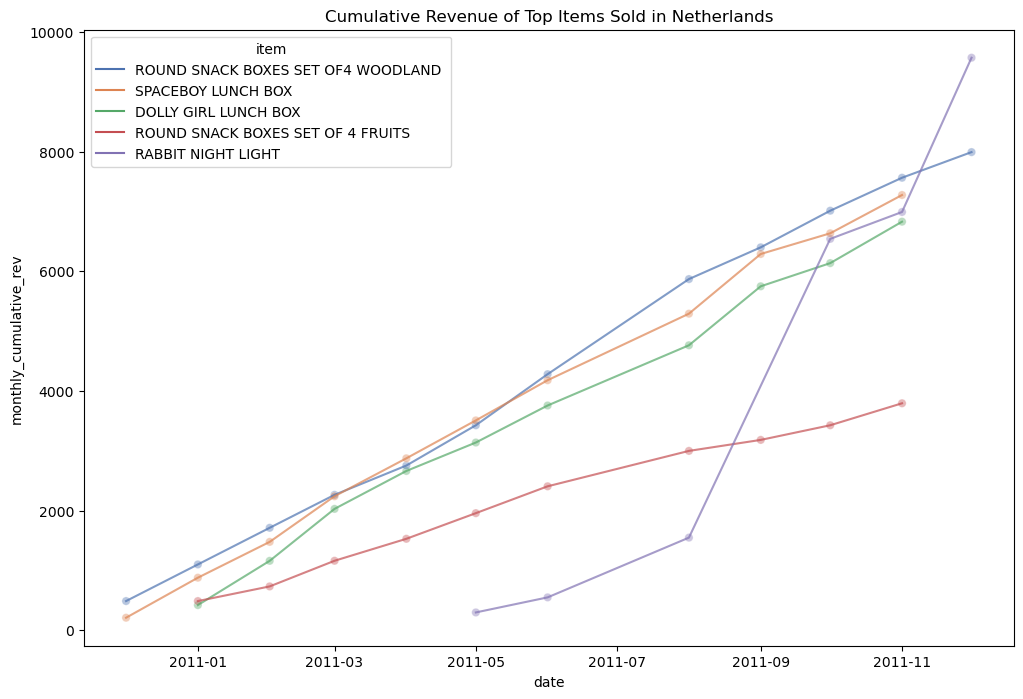

**************************************************
Generating SQL Query for EIRE...
**************************************************
+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|JAM MAKING SET WI...|   12|2010|                 83.25|
|            CARRIAGE|   12|2010|                 200.0|
|REGENCY CAKESTAND...|   12|2010|    380.14285714285717|
|            CARRIAGE|    1|2011|                 400.0|
|3 TIER CAKE TIN R...|    1|2011|                1224.0|
|JAM MAKING SET WI...|    1|2011|                 481.5|
|REGENCY CAKESTAND...|    1|2011|                2284.2|
|3 TIER CAKE TIN R...|    2|2011|                 816.0|
|            CARRIAGE|    2|2011|                598.75|
|JAM MAKING SET WI...|    2|2011|                 642.0|
|REGENCY CAKESTAND...|    2|2011|    2534.7999999999997|
|3 TIER CAKE TIN R...|    3|2011|                1428.0|
|         

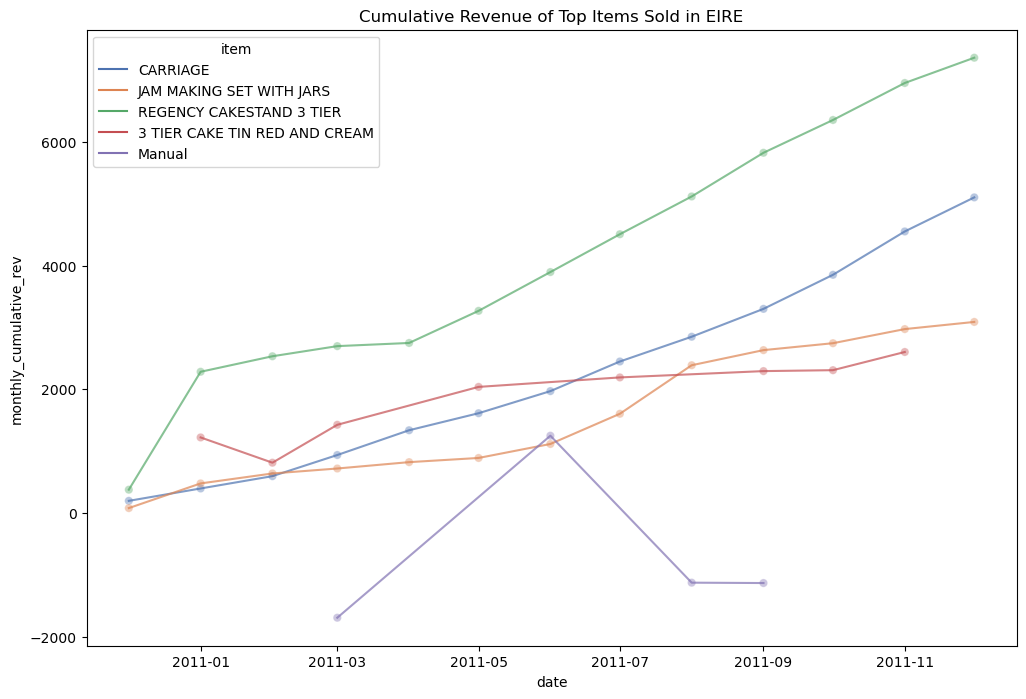

**************************************************
Generating SQL Query for France...
**************************************************
+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|             POSTAGE|   12|2010|     515.6470588235294|
|RED TOADSTOOL LED...|   12|2010|    203.65714285714284|
|REGENCY CAKESTAND...|   12|2010|                  25.5|
|             POSTAGE|    1|2011|               1672.56|
|RED TOADSTOOL LED...|    1|2011|    413.32499999999993|
|REGENCY CAKESTAND...|    1|2011|    142.92000000000002|
|             POSTAGE|    2|2011|                2885.4|
|RED TOADSTOOL LED...|    2|2011|     574.1999999999999|
|REGENCY CAKESTAND...|    2|2011|    252.52499999999998|
|             POSTAGE|    3|2011|                3663.0|
|REGENCY CAKESTAND...|    3|2011|                 359.8|
|RED TOADSTOOL LED...|    3|2011|     707.1428571428571|
|REGENCY

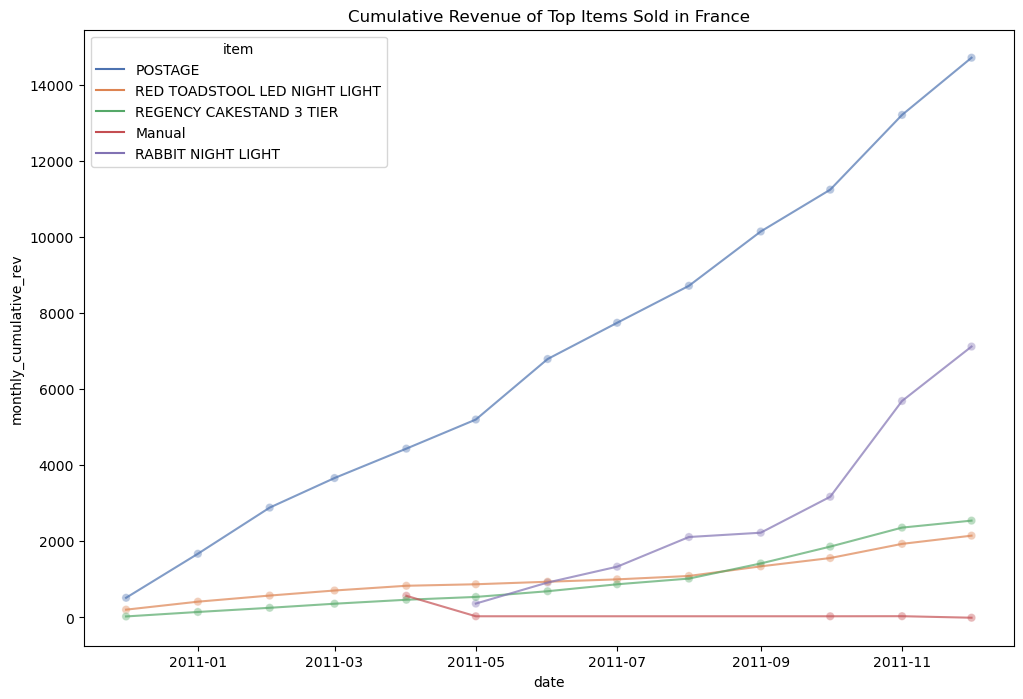

**************************************************
Generating SQL Query for Germany...
**************************************************
+--------------------+-----+----+----------------------+
|                item|month|year|monthly_cumulative_rev|
+--------------------+-----+----+----------------------+
|             POSTAGE|   12|2010|     855.3333333333334|
|REGENCY CAKESTAND...|   12|2010|     661.5428571428572|
|ROUND SNACK BOXES...|   12|2010|    212.39999999999998|
|             POSTAGE|    1|2011|    2760.8275862068967|
|REGENCY CAKESTAND...|    1|2011|    1459.6499999999999|
|ROUND SNACK BOXES...|    1|2011|     433.6499999999999|
|             POSTAGE|    2|2011|    3845.6470588235293|
|REGENCY CAKESTAND...|    2|2011|              2070.625|
|ROUND SNACK BOXES...|    2|2011|     546.1714285714286|
|             POSTAGE|    3|2011|     4937.333333333333|
|REGENCY CAKESTAND...|    3|2011|    2420.4409090909094|
|ROUND SNACK BOXES...|    3|2011|     732.4849999999999|
|      

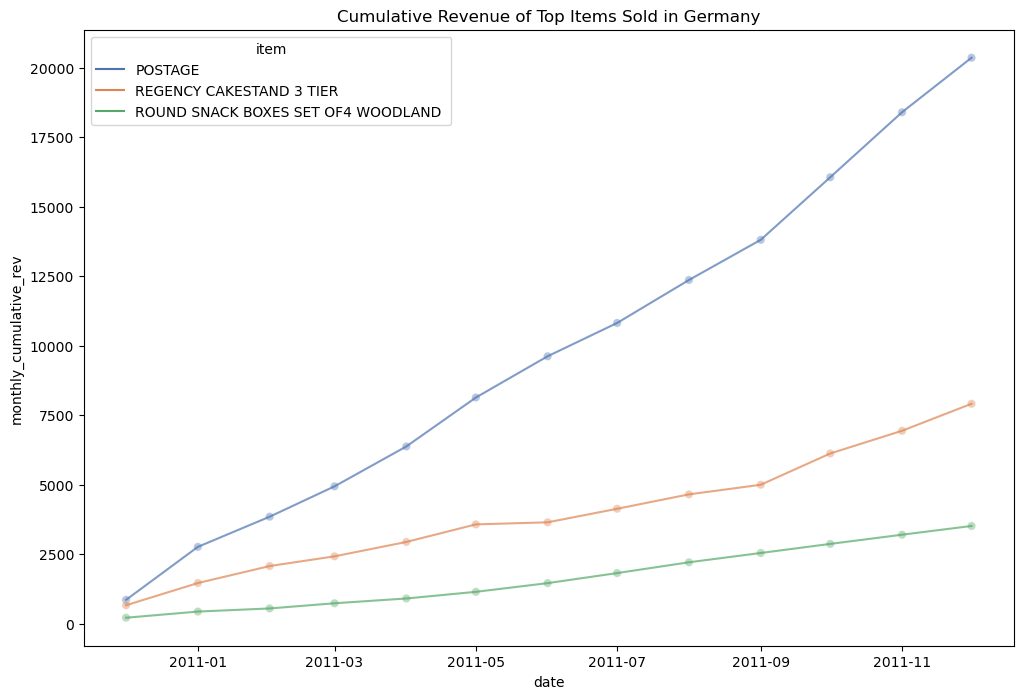

In [177]:
for country in ['Netherlands','EIRE','France','Germany']:
    
    if country == 'Netherlands':
        value = 4000
    elif country == 'EIRE':
        value = 3000
    elif country == 'France':
        value= 2000
    elif country == 'Germany':
        value = 2000
        
    print('*'*50)
    print(f'Generating SQL Query for {country}...')
    print('*'*50)
    
    res = sql(f"""

    WITH cte AS (
    SELECT *, ROUND(Quantity*UnitPrice, 2) AS revenue 
    FROM retail
    ),

        cte2 AS (
        SELECT Description, revenue, InvoiceDate,
            ROUND(SUM(revenue) OVER(PARTITION BY Description ORDER BY InvoiceDate 
            ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW),2) AS cumulative_rev
        FROM cte
        WHERE Country = '{country}'
        ),

        cte3 AS (
        SELECT 
                        Description AS item,                
                        EXTRACT(MONTH FROM InvoiceDate) AS month,
                        EXTRACT(YEAR FROM InvoiceDate) AS year,
                        cumulative_rev
        FROM cte2
        WHERE Description IN
            (SELECT Description
            FROM cte2
            GROUP BY Description
            HAVING MAX(cumulative_rev) > {value})
    )

    SELECT item, month, year, AVG(cumulative_rev) AS monthly_cumulative_rev
    FROM cte3
    GROUP BY item, month, year
    ORDER BY year, month

    """)
    
    dfp = res.toPandas()

    dfp['date'] = pd.to_datetime(dfp['year'].astype(str) + '-' + dfp['month'].astype(str) + '-01')

    plt.figure(figsize=(12,8))
    sns.lineplot(x=dfp.date, y=dfp.monthly_cumulative_rev, hue=dfp.item, alpha=0.7)
    sns.scatterplot(x='date', y='monthly_cumulative_rev', hue='item', data=dfp, marker='o', alpha=0.4, legend=False)

    plt.title(f'Cumulative Revenue of Top Items Sold in {country}')
    plt.show();

### Definitely some interesting patterns in the other countries that have little to do with Party Bunting - but that rabbit night light seems to be taking off. 

### What about individual customers? Who's our most profitable buyer, and what are they buying?

In [187]:
res = sql("""


SELECT *, ROUND(Quantity*UnitPrice, 2) AS revenue 
FROM retail
ORDER BY revenue DESC
LIMIT 10;

""")

+------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+--------+
|   _c0|InvoiceNo|StockCode|         Description|Quantity|        InvoiceDate|UnitPrice|CustomerID|       Country| revenue|
+------+---------+---------+--------------------+--------+-------------------+---------+----------+--------------+--------+
|540421|   581483|    23843|PAPER CRAFT , LIT...|   80995|2011-12-09 09:15:00|     2.08|   16446.0|United Kingdom|168469.6|
| 61619|   541431|    23166|MEDIUM CERAMIC TO...|   74215|2011-01-18 10:01:00|     1.04|   12346.0|United Kingdom| 77183.6|
|222680|   556444|    22502|PICNIC BASKET WIC...|      60|2011-06-10 15:28:00|    649.5|   15098.0|United Kingdom| 38970.0|
| 15017|   537632|AMAZONFEE|          AMAZON FEE|       1|2010-12-07 15:08:00| 13541.33|      NULL|United Kingdom|13541.33|
|299982|  A563185|        B|     Adjust bad debt|       1|2011-08-12 14:50:00| 11062.06|      NULL|United Kingdom|11062.06|
|173382|

In [189]:
res = sql("""

WITH cte AS (
SELECT *, ROUND(Quantity*UnitPrice, 2) AS revenue 
FROM retail
)

SELECT CustomerID, Country, ROUND(SUM(revenue),2) AS total_rev
FROM cte
WHERE CustomerID IS NOT NULL
GROUP BY CustomerID, Country
ORDER BY total_rev DESC
LIMIT 10;


""")

+----------+--------------+---------+
|CustomerID|       Country|total_rev|
+----------+--------------+---------+
|   14646.0|   Netherlands|279489.02|
|   18102.0|United Kingdom|256438.49|
|   17450.0|United Kingdom|187482.17|
|   14911.0|          EIRE|132572.62|
|   12415.0|     Australia|123725.45|
|   14156.0|          EIRE|113384.14|
|   17511.0|United Kingdom| 88125.38|
|   16684.0|United Kingdom| 65892.08|
|   13694.0|United Kingdom|  62653.1|
|   15311.0|United Kingdom| 59419.34|
+----------+--------------+---------+



In [208]:
res = sql("""

WITH customer_revenue AS (
    SELECT 
        CustomerID,
        Country,
        ROUND(SUM(Quantity * UnitPrice), 2) AS total_rev
    FROM retail
    WHERE CustomerID IS NOT NULL
    GROUP BY CustomerID, Country
    ORDER BY total_rev DESC
    LIMIT 1
),
    
    purchased as (
    SELECT 
        CustomerID, Description, UnitPrice,
        SUM(Quantity) as total_purchased 
    FROM retail
    WHERE 
        InvoiceNo NOT LIKE 'C%' AND
        CustomerID IN (SELECT CustomerID FROM customer_revenue)
    GROUP BY Description, CustomerID, UnitPrice
    ORDER BY CustomerID
)

SELECT *, ROUND(UnitPrice*total_purchased,2) AS total_revenue
FROM purchased
ORDER BY total_revenue DESC
LIMIT 5
;



""")

+----------+--------------------+---------+---------------+-------------+
|CustomerID|         Description|UnitPrice|total_purchased|total_revenue|
+----------+--------------------+---------+---------------+-------------+
|   14646.0|ROUND SNACK BOXES...|     2.55|           3120|       7956.0|
|   14646.0| SPACEBOY LUNCH BOX |     1.65|           4480|       7392.0|
|   14646.0|  RABBIT NIGHT LIGHT|     2.08|           3361|      6990.88|
|   14646.0|DOLLY GIRL LUNCH BOX|     1.65|           4096|       6758.4|
|   14646.0|ROUND SNACK BOXES...|     2.55|           1584|       4039.2|
+----------+--------------------+---------+---------------+-------------+



<Figure size 600x1000 with 0 Axes>

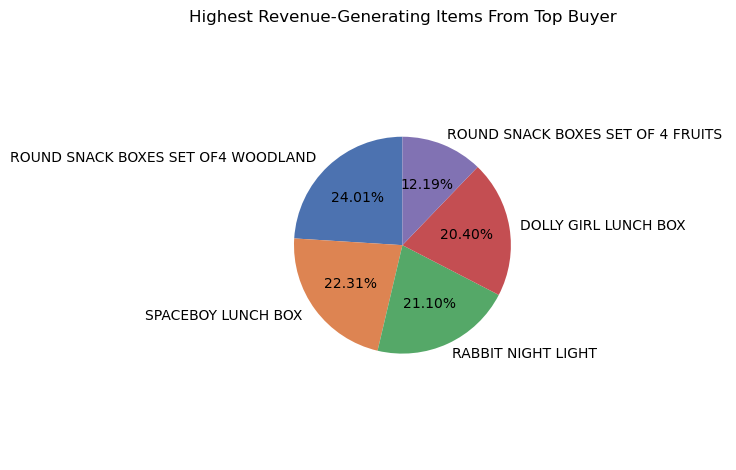

In [232]:
dfp = res.toPandas()

plt.figure(figsize=(6, 10))
dfp.plot.pie(y='total_revenue', labels=dfp.Description, autopct='%1.2f%%', startangle=90, legend=False)
plt.axis('equal')
plt.ylabel('')
plt.title('Highest Revenue-Generating Items From Top Buyer')
plt.tight_layout()
plt.show();

### Let's make sure we keep hitting those numbers with deals on Round Snack Boxes!